# HW1 - Linear Regression - Question 2

______________________________________________________________________________

##**Task (1)** Implement the one-step solution algorithm.  
  a) Give the results of obtained coefficient, w 

  $$\mathbf{w} = (\Phi^T\Phi)^{-1} (\Phi^T \mathbf{t})$$

  b) Show the predicted f(x) when applying the learned regression function on testing data x, and compare it with the corresponding actual target t on the same figure;

c) What is the Root-Mean-Square Error $E_{rms}$ on test set? 

$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N} \{y(x_n,\mathbf{w}) - t_n\}^2$$
$$E_{rms} = \sqrt{2*E(\mathbf{w})/N } = \sqrt{\frac{1}{N}\sum_{n=1}^{N} \{y(x_n,\mathbf{w}) - t_n\}^2}$$




Showing Dataset


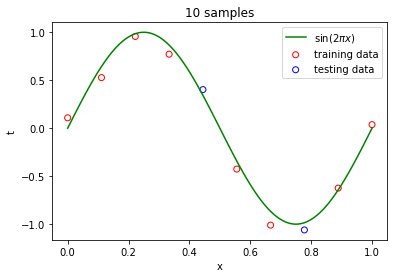


a) Give the results of obtained coefficient, w 
#basis functions: 6
w: [ 1.04047626e-01  2.06379499e+00  3.20540599e+01 -1.51871316e+02
  1.94101403e+02 -7.64141468e+01]

b) Show the predicted  f(x) when applying the learned regression function on testing data 
and compare it with the corresponding actual target t on  the same figure



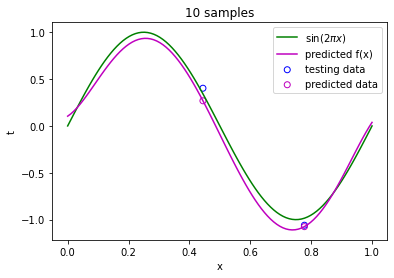


c) Root-Mean-Square Error on test set: 0.0953 



In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import seed, shuffle
from numpy.linalg import inv
import pandas as pd

np.random.seed(2345675)
#np.random.seed(45547)


# Show dataset
def show_dataset(x_train, t_train, x_test, t_test):
  print("Showing Dataset")
  plt.scatter(x_train, t_train,  facecolor="none", edgecolor="r", 
              label="training data")
  plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
              label="testing data")
  plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")
  plt.xlabel('x')
  plt.ylabel('t')
  plt.title('%d samples' % N)
  plt.legend()
  plt.show()

# function to generate a set of data samples
def create_dataset(function, size, noise_std):
    x = np.linspace(0, 1, size) # + np.random.rand(size) * 0.05
    t = function(x) + np.random.normal(scale=noise_std, size=x.shape)
    return x, t

# Function sin(2*pi*x)
def sin2pix(x):
  return np.sin(2 * np.pi * x)

# Basis functions
def phi(x, id_column):
  return x**id_column


# Parameters 
N = 10          # N: number of datapoints
M = 6           # M: number of basis functions
noise_mu = 0      # Noise mean
noise_std = 0.15   # Noise std 

# Function to obtain 
x_sin   = np.linspace(0, 1, 100)
y_sin = sin2pix(x_sin)

# Generate a set of data samples
x, t = create_dataset(sin2pix, N, noise_std)

# Split data samples: train(80%) / test(20%)
train_size = int(x.shape[0]*0.8) 
ids = np.random.permutation(x.shape[0])
id_train, id_test = ids[:train_size], ids[train_size:]
x_train, x_test = x[id_train], x[id_test]
t_train, t_test = t[id_train], t[id_test]

################################################################################
# Show dataset
################################################################################
show_dataset(x_train, t_train, x_test, t_test)


################################################################################
# a) Give the results of obtained coefficient, w 
################################################################################

# Make design matrix
Phi = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)

# Solve w
w = inv(Phi.T @ Phi) @ Phi.T @ t_train[:, None]

print("\na) Give the results of obtained coefficient, w ")
print("#basis functions: %d" % M)
print("w:", np.squeeze(w))

w_task1 = w

################################################################################
# b) Show the predicted f(x) when applying the learned regression function on 
# testing data x, and compare it with the corresponding actual target t 
# on the same figure;
################################################################################

# Learned regression function f(x)
Phi_tmp = np.stack([ phi(x_sin, m) for m in range(M)], axis=-1)
f_predicted = np.ravel(Phi_tmp @ w)

#  Predicted f(x) on testing data
Phi_test = np.stack([ phi(x_test, m) for m in range(M)], axis=-1)
t_pred = np.ravel(Phi_test @ w)

# Plot
print("\nb) Show the predicted  f(x) when applying the learned regression "
"function on testing data \nand compare it with the corresponding actual "
"target t on  the same figure\n")

plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")
plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
            label="testing data")
plt.scatter(x_test, t_pred,  facecolor="none", edgecolor="m",
            label="predicted data")
plt.plot(x_sin, f_predicted, 'm', label="predicted f(x)")
plt.xlabel('x')
plt.ylabel('t')
plt.title('%d samples' % N)
plt.legend()
plt.show()

################################################################################
# c) What is the Root-Mean-Square Error on test set?
################################################################################

def rmse(t, t_pred):
    return np.sqrt(np.mean(np.square(t - t_pred)))

rmse_task1 = rmse(t_test, t_pred)
print("\nc) Root-Mean-Square Error on test set: %.4f \n" % rmse_task1)

______________________________________________________________________________

##**Task (2)** Implement the batch gradient descent algorithm.  

a) Show the decreasing curve of error function with the increasing of iteration 
numbers.  

b) Give the results of obtained coefficient, w 

c) Show the predicted  f(x) when applying the learned regression function on 
testing data x, and compare it with the corresponding actual target  t  on the 
same figure; 

d) What is the Root-Mean-Square Error on test set? 

e) Compare the value of w obtained at (1) and (2), are they the same? If not, try to check if your implementation is wrong. 


a) Show the decreasing curve of error function with the increasing of iteration numbers.



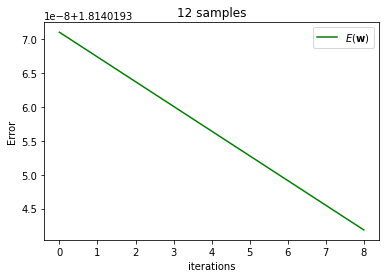


b) Give the results of obtained coefficient, w 
#basis functions: 9
w: [ 1.80025953e-01  3.70955015e+01 -7.91990507e+02  6.24273678e+03
 -2.37498274e+04  4.88113310e+04 -5.57634918e+04  3.34055118e+04
 -8.19158598e+03]

c) Show the predicted  f(x) when applying the learned regression function on testing data 
and compare it with the corresponding actual target t on  the same figure



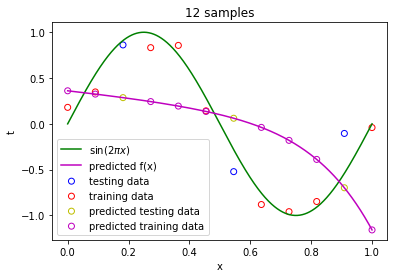


d) Root-Mean-Square Error on test set: 0.5839 


e) Compare the value of w obtained at (1) and (2), are they the same? If not, try to check if your implementation is wrong.

On task (1) w: 
 [ 1.04047626e-01  2.06379499e+00  3.20540599e+01 -1.51871316e+02
  1.94101403e+02 -7.64141468e+01]
On task (2) w: 
 [ 0.3608619  -0.3842258  -0.09507916 -0.31390989  0.20398468 -0.27577904
 -0.47570294 -0.24527944  0.06727995]

They are very different, so probably my implementation is wrong, however, I could not find the problem in my code :/
That difference is reflected also in the RMS Error on the tasks:
Task1: 0.0953
Task2: 0.5839


In [89]:
np.random.seed(2345675)
################################################################################
# Batch gradient descent algorithm
################################################################################

# number of iterations 
num_itr = int(5e+6)

# Learning rate
lr = 1e-9

# Initialize w
w_gdesc = np.random.normal(scale=.5, size=(M,1)) 

# Create error vector
E = np.zeros(num_itr)

# Make design matrix
Phi_train = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)

for i in range(num_itr):
  # Equation (3.23)   
  w_gdesc = w_gdesc + lr * Phi_train.T @ (t_train[:, None] - Phi_train @ w_gdesc) 
  # Equation (3.12)
  E[i] = np.sum(np.square(Phi_train @ w_gdesc - t_train[:, None]))/2 


################################################################################
# a) Show the decreasing curve of error function with the increasing 
# of iteration numbers.
################################################################################
# Plot
print("\na) Show the decreasing curve of error function with the increasing "
"of iteration numbers.\n")

axis_x = [i for i in range(train_size)]
axis_y = E[axis_x]

plt.plot(axis_x, axis_y, 'g', label="$E(\mathbf{w})$")

plt.xlabel('iterations')
plt.ylabel('Error')
plt.title('%d samples' % N)
plt.legend()
plt.show()

################################################################################
# b) Give the results of obtained coefficient, w
################################################################################

print("\nb) Give the results of obtained coefficient, w ")
print("#basis functions: %d" % M)
print("w:", np.squeeze(w))

w_task2 = w_gdesc

################################################################################
# c) Show the predicted f(x) when applying the learned regression function on 
# testing data x, and compare it with the corresponding actual target t 
# on the same figure;
################################################################################

# Learned regression function f(x)
Phi_tmp = np.stack([ phi(x_sin, m) for m in range(M)], axis=-1)
f_predicted = np.ravel(Phi_tmp @ w_gdesc)

#  Predicted f(x) on testing data
Phi_test = np.stack([ phi(x_test, m) for m in range(M)], axis=-1)
t_pred = np.ravel(Phi_test @ w_gdesc)

#  Predicted f(x) on training data
Phi_train = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)
t_pred_train = np.ravel(Phi_train @ w_gdesc)

# Plot
print("\nc) Show the predicted  f(x) when applying the learned regression "
"function on testing data \nand compare it with the corresponding actual "
"target t on  the same figure\n")

plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")
plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
            label="testing data")

plt.scatter(x_train, t_train,  facecolor="none", edgecolor="r", 
            label="training data")

plt.scatter(x_test, t_pred,  facecolor="none", edgecolor="y",
            label="predicted testing data")

plt.scatter(x_train, t_pred_train,  facecolor="none", edgecolor="m",
            label="predicted training data")

plt.plot(x_sin, f_predicted, 'm', label="predicted f(x)")
plt.xlabel('x')
plt.ylabel('t')
plt.title('%d samples' % N)
plt.legend()
plt.show()

################################################################################
# d) What is the Root-Mean-Square Error on test set?
################################################################################

def rmse(t, t_pred):
    return np.sqrt(np.mean(np.square(t - t_pred)))

rmse_task2 = rmse(t_test, t_pred)
print("\nd) Root-Mean-Square Error on test set: %.4f \n" % rmse_task2)

################################################################################
# e) Compare the value of w obtained at (1) and (2), are they the same?  
# If not, try to check if your implementation is wrong.
################################################################################

print("\ne) Compare the value of w obtained at (1) and (2), are they the same? "
"If not, try to check if your implementation is wrong.\n")
print("On task (1) w: \n", np.squeeze(w_task1))
print("On task (2) w: \n", np.squeeze(w_task2))

print("\nThey are very different, so probably my implementation is wrong, "
"however, I could not find the problem in my code :/")



print("That difference is reflected also in the RMS Error on the tasks:")
print("Task1: %.4f" % rmse_task1)
print("Task2: %.4f" % rmse_task2)


______________________________________________________________________________

##**Task (3)** Play with the number of training samples and the number of basis functions. Show one case when the overfitting issue happens.
a) What are the values of w when the overfitting issue happens?

b) What is the Root-Mean-Square Error on your training and test set respectively when the overfitting issue happens?

[ANSWER] Task 3
The overffiting happens when the number of trainig samples is too close to the numner of basis fuctions:
#Training samples: 12
#basis functions: 9

a) What are the values of w when the overfitting issue happens?

[ANSWER a] - The values of w are too large, as you can see below:
Values of w:
              w
0      0.180026
1     37.095502
2   -791.990507
3   6242.736785
4 -23749.827447
5  48811.331010
6 -55763.491761
7  33405.511801
8  -8191.585979

b) What is the Root-Mean-Square Error on your training and testing set  respectively when the overfitting issue happens?

[ANSWER b] - The RMD Error on training set is very small because the model fits very well all the poins in training set (as shown in the Figure below).
By the other hand it is not able to predict well the points in the testing set.

RMS Error: Train=0.0000  and Test=0.3861 


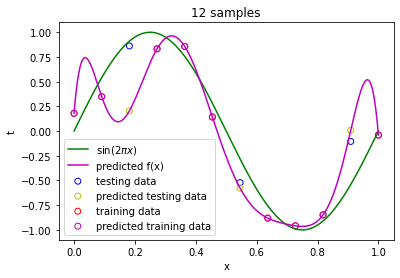

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import seed, shuffle
from numpy.linalg import inv
import pandas as pd
np.random.seed(2345675)

# Show dataset
def show_dataset(x_train, t_train, x_test, t_test):
  print("Showing Dataset")
  plt.scatter(x_train, t_train,  facecolor="none", edgecolor="r", 
              label="training data")
  plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
              label="testing data")
  plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")
  plt.xlabel('x')
  plt.ylabel('t')
  plt.title('%d samples' % N)
  plt.legend()
  plt.show()

# function to generate a set of data samples
def create_dataset(function, size, noise_std):
    x = np.linspace(0, 1, size) # + np.random.rand(size) * 0.05
    t = function(x) + np.random.normal(scale=noise_std, size=x.shape)
    return x, t

# Function sin(2*pi*x)
def sin2pix(x):
  return np.sin(2 * np.pi * x)

# Basis functions
def phi(x, id_column):
  return x**id_column

# Parameters 
N = 12           # N: number of datapoints
M = 9             # M: number of basis functions
noise_mu = 0      # Noise mean
noise_std = 0.25   # Noise std 

# Function to obtain 
x_sin   = np.linspace(0, 1, 1000)
y_sin = sin2pix(x_sin)

# Generate a set of data samples
x, t = create_dataset(sin2pix, N, noise_std)

# Split data samples: train(80%) / test(20%)
train_size = int(x.shape[0]*0.8) 
ids = np.random.permutation(x.shape[0])
id_train, id_test = ids[:train_size], ids[train_size:]
x_train, x_test = x[id_train], x[id_test]
t_train, t_test = t[id_train], t[id_test]


# show_dataset(x_train, t_train, x_test, t_test)
print("[ANSWER] Task 3")
print("The overffiting happens when the number of trainig samples is too close to the numner of basis fuctions:")
print("#Training samples: %d" % N)
print("#basis functions: %d" % M)

################################################################################
# a) What are the values of w when the overfitting issue happens?
################################################################################

# Make design matrix
Phi = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)

# Solve w
w = inv(Phi.T @ Phi) @ Phi.T @ t_train[:, None]

print("\na) What are the values of w when the overfitting issue happens?\n")
print("[ANSWER a] - The values of w are too large, as you can see below:") 
w_overffited_df = pd.DataFrame(w, columns = ['w'])
print("Values of w:")
print(w_overffited_df)


################################################################################
# b) What is the Root-Mean-Square Error on your training and testing set 
# respectively when the overfitting issue happens?
################################################################################

def rmse(t, t_pred):
    return np.sqrt(np.mean(np.square(t - t_pred)))

# Learned regression function f(x)
Phi_tmp = np.stack([ phi(x_sin, m) for m in range(M)], axis=-1)
f_predicted = np.ravel(Phi_tmp @ w)


#  Predicted f(x) on training data
Phi_train = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)
t_pred_train = np.ravel(Phi_train @ w)

#  Predicted f(x) on testing data
Phi_test = np.stack([ phi(x_test, m) for m in range(M)], axis=-1)
t_pred_test = np.ravel(Phi_test @ w)    

rmse_train = rmse(t_train, t_pred_train)
rmse_test  = rmse(t_test,  t_pred_test)


print("\nb) What is the Root-Mean-Square Error on your training and testing set "
" respectively when the overfitting issue happens?\n")
print("[ANSWER b] - The RMD Error on training set is very small because the model"
" fits very well all the poins in training set (as shown in the Figure below).")
print("By the other hand it is not able to predict well the points in the testing set.\n" )
print("RMS Error: Train=%.4f  and Test=%.4f " % (rmse_train, rmse_test))



################################################################################
# Show the predicted f(x) when applying the learned regression function on 
# training and testing data x, and compare it with the corresponding actual 
# target t  on the same figure;
################################################################################



# Plot

plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")

plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
            label="testing data")

plt.scatter(x_test, t_pred_test,  facecolor="none", edgecolor="y",
            label="predicted testing data")

plt.scatter(x_train, t_train,  facecolor="none", edgecolor="r", 
            label="training data")

plt.scatter(x_train, t_pred_train,  facecolor="none", edgecolor="m",
            label="predicted training data")
plt.plot(x_sin, f_predicted, 'm', label="predicted f(x)")
plt.xlabel('x')
plt.ylabel('t')
plt.title('%d samples' % N)
plt.legend()
plt.show()



______________________________________________________________________________

##**Task (4)** Add a regularization term to your objective function, and show how it helps on addressing the overfitting issue.  

$\mathbf{w} = (\Phi^T\Phi + \lambda\mathbf{I})^{-1} (\Phi^T \mathbf{t})$

a) What are the values of w when the overfitting issue is addressed by 
applying regularization? 
 
b) What is the Root-Mean-Square Error on your training and test set 
respectively when the overfitting issue is addressed by applying 
regularization? 
 
c) How did the coefficient of the regularization term play in solving your 
overfitting issue? Do you have a figure like below? 


a) What are the values of w when the overfitting issue happens?

[ANSWER a] - The values of w are small, close to zero, as you can see below:
Values of w:
           w
0   0.115500
1   3.685978
2   4.837123
3 -34.253363
4   1.899851
5  23.882564
6  19.713971
7   1.041462
8 -20.963599

b) What is the Root-Mean-Square Error on your training and testing set  respectively when the overfitting issue is addressed by applying regularization?

[ANSWER b] - Although the RMS error on the training set is higher than 
  the case without normalization, RMS error on the testing set is much better 
than when compared to situations without normalization on the learning of w.
RMS Error: Train=0.0923  and Test=0.1690 


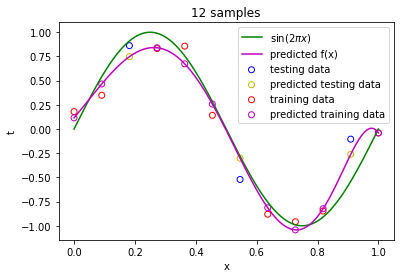

[ANSWER c] - Plotting  values of the coefficient of the regularization 
 against the RMS error for both training and test set we can see the value of 
 lambda controls the behavior of the model and, as a consequence, it determines 
 the degree of overfitting.


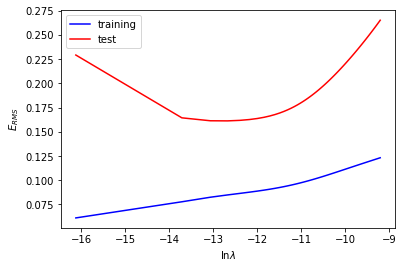

In [92]:
################################################################################
# a) What are the values of w when the overfitting issue is addressed by 
# applying regularization?
################################################################################

coef = 0.00001

# Make design matrix
Phi = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)

# Solve w
w_reg = inv(Phi.T @ Phi + coef * np.identity(M)) @ Phi.T @ t_train[:, None]

print("\na) What are the values of w when the overfitting issue happens?\n")
print("[ANSWER a] - The values of w are small, close to zero, as you can see below:") 
w_reg_overffited_df = pd.DataFrame(w_reg, columns = ['w'])
print("Values of w:")
print(w_reg_overffited_df)

################################################################################
# b) What is the Root-Mean-Square Error on your training and testing set 
# respectively when the overfitting issue is addressed by applying regularization?
################################################################################

def rmse(t, t_pred):
    return np.sqrt(np.mean(np.square(t - t_pred)))

# Learned regression function f(x)
Phi_tmp = np.stack([ phi(x_sin, m) for m in range(M)], axis=-1)
f_predicted = np.ravel(Phi_tmp @ w_reg)


#  Predicted f(x) on training data
Phi_train = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)
t_pred_train = np.ravel(Phi_train @ w_reg)

#  Predicted f(x) on testing data
Phi_test = np.stack([ phi(x_test, m) for m in range(M)], axis=-1)
t_pred_test = np.ravel(Phi_test @ w_reg)    

rmse_train = rmse(t_train, t_pred_train)
rmse_test  = rmse(t_test,  t_pred_test)

print("\nb) What is the Root-Mean-Square Error on your training and testing set "
" respectively when the overfitting issue is addressed by applying regularization?\n")

print("[ANSWER b] - Although the RMS error on the training set is higher than \n "
" the case without normalization, RMS error on the testing set is much better \n"
"than when compared to situations without normalization on the learning of w." )
print("RMS Error: Train=%.4f  and Test=%.4f " % (rmse_train, rmse_test))


# Plot
plt.plot(x_sin, y_sin, 'g', label="$\sin(2\pi x)$")

plt.scatter(x_test, t_test,  facecolor="none", edgecolor="b", 
            label="testing data")

plt.scatter(x_test, t_pred_test,  facecolor="none", edgecolor="y",
            label="predicted testing data")

plt.scatter(x_train, t_train,  facecolor="none", edgecolor="r", 
            label="training data")

plt.scatter(x_train, t_pred_train,  facecolor="none", edgecolor="m",
            label="predicted training data")
plt.plot(x_sin, f_predicted, 'm', label="predicted f(x)")
plt.xlabel('x')
plt.ylabel('t')
plt.title('%d samples' % N)
plt.legend()
plt.show()

################################################################################
# c) How did the coefficient of the regularization term play in solving your 
# overfitting issue? Do you have a figure like below?
################################################################################

print("[ANSWER c] - Plotting  values of the coefficient of the regularization \n"
" against the RMS error for both training and test set we can see the value of \n"
" lambda controls the behavior of the model and, as a consequence, it determines \n"
" the degree of overfitting.")

#coef_list = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
coef_list = np.flip(np.linspace(0.0000001, 0.0001, 100))
rmse_train_list = np.zeros_like(coef_list)
rmse_test_list = np.zeros_like(coef_list)

for i, coef in enumerate(coef_list):

  # Make design matrix
  Phi = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)

  # Solve w
  w_reg = inv(Phi.T @ Phi + coef * np.identity(M)) @ Phi.T @ t_train[:, None]


  # Learned regression function f(x)
  Phi_tmp = np.stack([ phi(x_sin, m) for m in range(M)], axis=-1)
  f_predicted = np.ravel(Phi_tmp @ w_reg)

  #  Predicted f(x) on training data
  Phi_train = np.stack([ phi(x_train, m) for m in range(M)], axis=-1)
  t_pred_train = np.ravel(Phi_train @ w_reg)

  #  Predicted f(x) on testing data
  Phi_test = np.stack([ phi(x_test, m) for m in range(M)], axis=-1)
  t_pred_test = np.ravel(Phi_test @ w_reg)    

  rmse_train_list[i] = rmse(t_train, t_pred_train)
  rmse_test_list[i]  = rmse(t_test,  t_pred_test)

  
# Plot
x_axis = np.log(coef_list)
plt.plot(x_axis, rmse_train_list, 'b', label="training")
plt.plot(x_axis, rmse_test_list, 'r', label="test")
plt.xlabel('$\ln{\lambda}$')
plt.ylabel('$E_{RMS}$')
#plt.title('%d samples' % N)
plt.legend()
plt.show()
